In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Data Loading and Exploration

We begin by loading the medical insurance dataset and performing initial exploration to understand the structure, datatypes, and check for any missing values.


In [25]:
# Load dataset
data = pd.read_csv(r'C:\Users\kanad\PycharmProjects\FSM.ML.2\Main\Medical_Price_Dataset.csv')

# Data exploration
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
        

## Data Visualization
Visualizing the distribution of charges and relationships with age, BMI, and smoking status helps identify patterns and outliers, which guide model development.


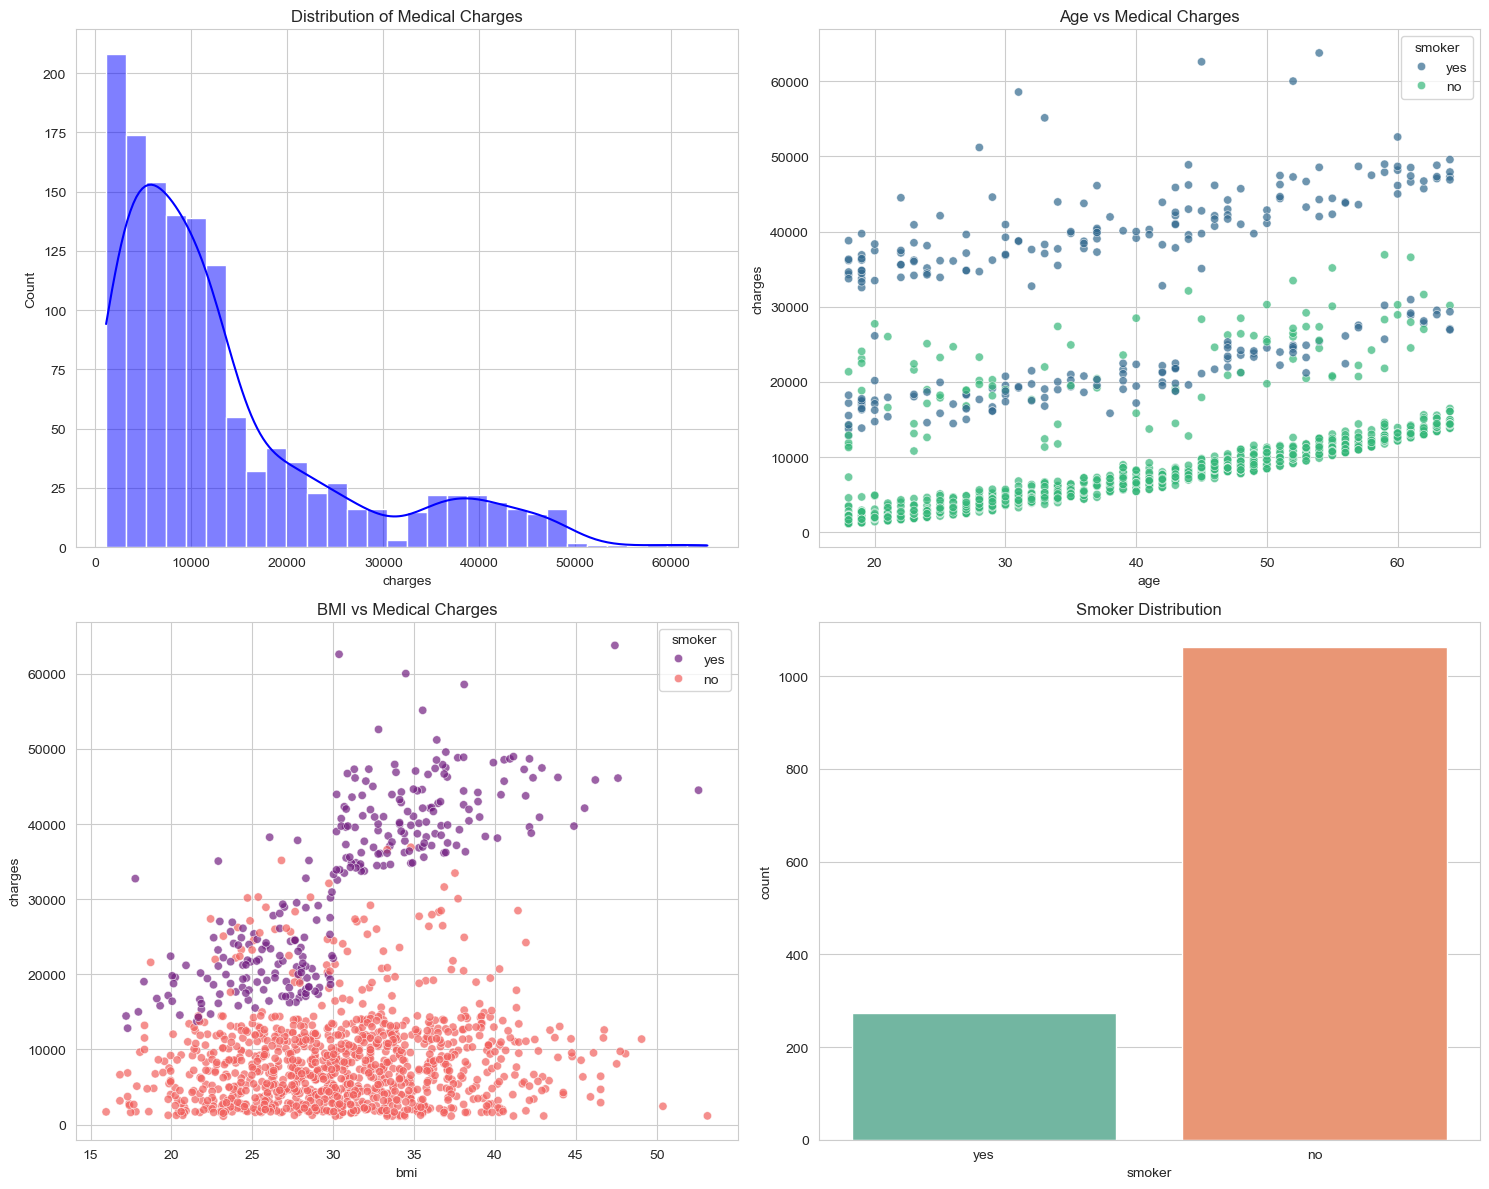

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.histplot(data['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Charges')
plt.subplot(2, 2, 2)
sns.scatterplot(x='age', y='charges', data=data, hue='smoker', palette='viridis', alpha=0.7)
plt.title('Age vs Medical Charges')
plt.subplot(2, 2, 3)
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', palette='magma', alpha=0.7)
plt.title('BMI vs Medical Charges')
plt.subplot(2, 2, 4)
sns.countplot(x='smoker', data=data, palette='Set2', hue='smoker', legend=False)
plt.title('Smoker Distribution')
plt.tight_layout()
plt.show()

## Data Preprocessing
We convert categorical variables into numeric format, normalize numerical features, and prepare the feature matrix X and target vector y. Normalization ensures features contribute equally to training.


In [29]:
def preprocess_data(df):
    df = df.copy()
    df['sex'] = df['sex'].map({'female': 0, 'male': 1}).astype(np.float64)
    df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1}).astype(np.float64)
    df = pd.get_dummies(df, columns=['region'], drop_first=True)
    numerical_cols = ['age', 'bmi', 'children']
    for col in numerical_cols:
        df[col] = ((df[col] - df[col].min()) /
                   (df[col].max() - df[col].min())).astype(np.float64)
    X = df.drop('charges', axis=1).values.astype(np.float64)
    y = df['charges'].values.reshape(-1, 1).astype(np.float64)
    X = np.hstack((np.ones((X.shape[0], 1), dtype=np.float64), X))
    return X, y

X, y = preprocess_data(data)